In [1]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.dates import date2num

C:\Users\11984\AppData\Local\Temp\ipykernel_11604\356331059.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  author_color_mapping = {author: cm.get_cmap('tab10')(i / len(unique_authors)) for i, author in enumerate(unique_authors)}


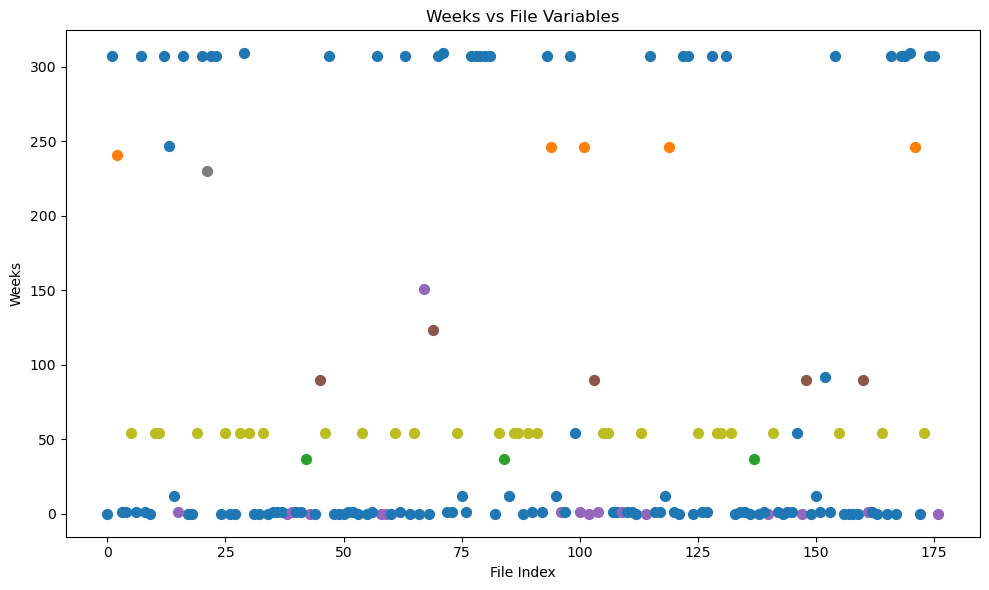

In [26]:
# Read the CSV file generated from the previous script
file_path = 'repo_miningrootbeer_authors.csv'  
with open(file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    data = [row for row in reader]

# information from the CSV data
filenames = [row['Filename'] for row in data]
authors = [row['OriginalAuthor'] for row in data]
dates = [datetime.strptime(row['LastModifiedDate'], "%Y-%m-%dT%H:%M:%SZ") for row in data]

# map authors to unique colors
unique_authors = list(set(authors))
author_color_mapping = {author: cm.get_cmap('tab10')(i / len(unique_authors)) for i, author in enumerate(unique_authors)}

# mapping of filenames to unique numerical identifiers
unique_filenames = list(set(filenames))
filename_index_mapping = {filename: i for i, filename in enumerate(unique_filenames)}

# 2D matrix to represent the scatter plot
weeks = [(date - min(dates)).days // 7 for date in dates]
scatter_matrix = [[-1] * len(unique_filenames) for _ in range(max(weeks) + 1)]

# matrix with author colors
for filename, author, week in zip(filenames, authors, weeks):
    file_index = filename_index_mapping[filename]
    scatter_matrix[week][file_index] = author_color_mapping[author]

# scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# the scatter matrix
for week, colors in enumerate(scatter_matrix):
    for file_index, color in enumerate(colors):
        if color != -1:
            ax.scatter(file_index, week, color=color, s=50)

# Beautify the plot
ax.set_xlabel('File Index')
ax.set_ylabel('Weeks')
ax.set_title('Weeks vs File Variables')

# Show the plot
plt.tight_layout()
plt.show()
